In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
from sklearn import preprocessing
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
#from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore")

In [100]:
dataframe = pd.read_csv('Loans - Public Test Set (No Labels).csv')

In [101]:
dataframe.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,16ecb7be-c90f-4bdb-b168-da705d9b1fa7,To be predicted,23023,Long Term,597,10+ years,Home Mortgage,72230,Debt Consolidation,$613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,01825d5d-429a-4de6-b3d4-8618364d2df2,9e0609db-23c1-43b0-9326-0e67ca1e8f1d,To be predicted,8126,Short Term,696,2 years,Rent,55869,Debt Consolidation,$665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,c54e404f-1e94-45a2-9473-972e2f3c378b,To be predicted,5042,Short Term,745,10+ years,Home Mortgage,40332,Debt Consolidation,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,37923e4e-df73-4093-a4b8-c2dfcbd0c8d8,To be predicted,14139,Long Term,677,< 1 year,Rent,70693,Debt Consolidation,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,d5dc29d5-06f9-452e-9d55-c1d543dca5dd,To be predicted,15191,Long Term,716,10+ years,Home Mortgage,38442,Debt Consolidation,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00


In [102]:
dataframe.isna().sum()

Loan ID                            0
Customer ID                        0
Loan Status                        0
Current Loan Amount                0
Term                               0
Credit Score                       0
Years in current job            1850
Home Ownership                     0
Annual Income                      0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       2
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                2
Bankruptcies                       2
Tax Liens                          2
dtype: int64

In [103]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44454 entries, 0 to 44453
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       44454 non-null  object 
 1   Customer ID                   44454 non-null  object 
 2   Loan Status                   44454 non-null  object 
 3   Current Loan Amount           44454 non-null  int64  
 4   Term                          44454 non-null  object 
 5   Credit Score                  44454 non-null  int64  
 6   Years in current job          42604 non-null  object 
 7   Home Ownership                44454 non-null  object 
 8   Annual Income                 44454 non-null  int64  
 9   Purpose                       44454 non-null  object 
 10  Monthly Debt                  44454 non-null  object 
 11  Years of Credit History       44454 non-null  float64
 12  Months since last delinquent  44452 non-null  float64
 13  N

In [104]:
train_df = dataframe

In [105]:
train_df.shape

(44454, 19)

In [106]:
train_df.duplicated().sum()

0

In [107]:
#train_df.drop_duplicates(inplace = True)

In [108]:
#train_df.duplicated().sum()

In [109]:
train_df.shape

(44454, 19)

In [110]:
#train_df.drop_duplicates(subset=["Loan ID"], keep='last', inplace=True)

In [111]:
train_df.shape

(44454, 19)

In [112]:
dataframe.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,44454.00,44454.00,44454.00,44454.00,44452.00,44454.00,44454.00,44454.00,44452.00,44452.00
mean,14000.40,721.55,72628.16,18.30,15.61,11.16,0.16,15668.18,0.11,0.03
std,8265.36,27.56,54480.82,7.05,22.57,5.03,0.47,20278.74,0.34,0.25
min,504.00,585.00,2979.00,3.40,0.00,0.00,0.00,0.00,0.00,0.00
25%,7819.00,710.00,44823.50,13.50,0.00,8.00,0.00,6005.25,0.00,0.00
50%,12060.50,731.00,61825.50,17.00,0.00,10.00,0.00,11214.00,0.00,0.00
75%,19526.00,741.00,87233.50,21.70,28.00,14.00,0.00,19501.00,0.00,0.00
max,35875.00,751.00,5001000.00,61.50,151.00,50.00,13.00,975995.00,7.00,13.00


<AxesSubplot:xlabel='Annual Income', ylabel='Density'>

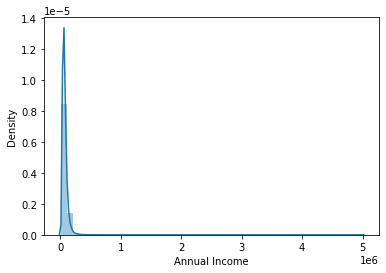

In [113]:
sns.distplot(dataframe['Annual Income'])

<AxesSubplot:xlabel='Annual Income'>

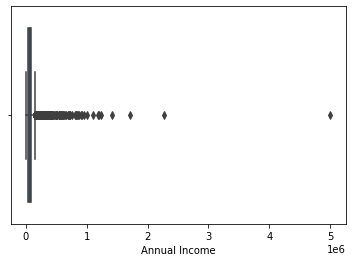

In [114]:
sns.boxplot(dataframe['Annual Income'])

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

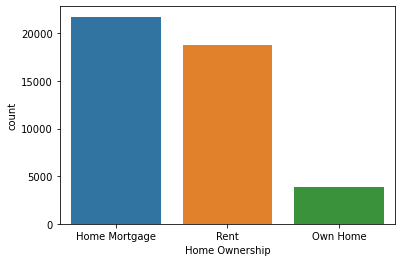

In [115]:
sns.countplot(dataframe['Home Ownership'])

In [116]:
dataframe['Purpose'].value_counts()

Debt Consolidation      35315
Home Improvements        2616
other                    2442
Other                    1395
Business Loan             656
Buy a Car                 535
Medical Bills             496
Buy House                 290
Take a Trip               234
major_purchase            150
small_business            141
Educational Expenses       52
moving                     50
vacation                   41
wedding                    38
renewable_energy            3
Name: Purpose, dtype: int64

In [117]:
dataframe[dataframe['Loan ID'].duplicated()]

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens


In [118]:
dataframe_label = pd.read_csv('Loans - Public Test Set (IDs and Labels).csv')

In [119]:
dataframe_label.head()

,Loan ID,Loan Status
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,Fully Paid
1,01825d5d-429a-4de6-b3d4-8618364d2df2,Charged Off
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,Fully Paid
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,Charged Off
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,Charged Off


<AxesSubplot:title={'center':'Loan Status'}>

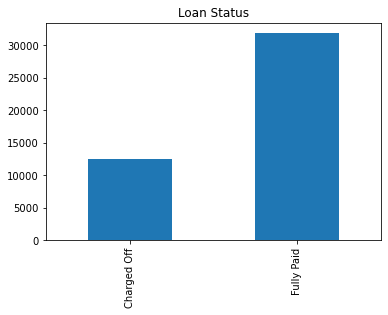

In [120]:
dataframe_label['Loan Status'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Loan Status')

#### Data Cleaning

In [121]:
train_df = dataframe.copy()

In [122]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,16ecb7be-c90f-4bdb-b168-da705d9b1fa7,To be predicted,23023,Long Term,597,10+ years,Home Mortgage,72230,Debt Consolidation,$613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,01825d5d-429a-4de6-b3d4-8618364d2df2,9e0609db-23c1-43b0-9326-0e67ca1e8f1d,To be predicted,8126,Short Term,696,2 years,Rent,55869,Debt Consolidation,$665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,c54e404f-1e94-45a2-9473-972e2f3c378b,To be predicted,5042,Short Term,745,10+ years,Home Mortgage,40332,Debt Consolidation,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,37923e4e-df73-4093-a4b8-c2dfcbd0c8d8,To be predicted,14139,Long Term,677,< 1 year,Rent,70693,Debt Consolidation,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,d5dc29d5-06f9-452e-9d55-c1d543dca5dd,To be predicted,15191,Long Term,716,10+ years,Home Mortgage,38442,Debt Consolidation,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00


In [123]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('$',' ')

In [124]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('<','').str.replace('year','').str.strip()

In [125]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('s','').str.strip()

In [126]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('+','').str.strip()

In [127]:
train_df['Years in current job'] = train_df['Years in current job'].str.replace('-','').str.strip()

In [128]:
#train_df['Credit Score'] = train_df['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

In [129]:
#train_df['Home Ownership'].replace({'HaveMortgage': 'Home Mortgage'}, inplace =True)

In [130]:
train_df['Purpose'].replace({'other': 'Other'}, inplace =True)

In [131]:
#train_df['Years in current_job'] = train_df['Years in current job'].astype(object)

In [132]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].str.replace('$',' ')

In [133]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].astype(str).replace(',', '', regex=True)

In [134]:
train_df['Monthly Debt'] = train_df['Monthly Debt'].astype(float)

In [135]:
train_df['Maximum Open Credit'] = pd.to_numeric(train_df['Maximum Open Credit'], errors='coerce')

In [136]:
train_df['Maximum Open Credit'] = train_df['Maximum Open Credit'].astype(float)

In [137]:
train_df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,16ecb7be-c90f-4bdb-b168-da705d9b1fa7,To be predicted,23023,Long Term,597,10,Home Mortgage,72230,Debt Consolidation,613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,01825d5d-429a-4de6-b3d4-8618364d2df2,9e0609db-23c1-43b0-9326-0e67ca1e8f1d,To be predicted,8126,Short Term,696,2,Rent,55869,Debt Consolidation,665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,c54e404f-1e94-45a2-9473-972e2f3c378b,To be predicted,5042,Short Term,745,10,Home Mortgage,40332,Debt Consolidation,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,37923e4e-df73-4093-a4b8-c2dfcbd0c8d8,To be predicted,14139,Long Term,677,1,Rent,70693,Debt Consolidation,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,d5dc29d5-06f9-452e-9d55-c1d543dca5dd,To be predicted,15191,Long Term,716,10,Home Mortgage,38442,Debt Consolidation,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00


In [138]:
train_df.duplicated().sum()

0

In [139]:
train_df.shape

(44454, 19)

In [140]:
dataframe.drop(columns=['Loan ID','Customer ID','Loan Status'],axis=1, inplace=True )

In [141]:
train_df.drop(columns=['Loan ID','Customer ID','Loan Status'],axis=1, inplace=True )

In [142]:
cat_data = ['Term','Home Ownership','Purpose']


In [143]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [144]:
for col in cat_data:
    train_df[col]=le.fit_transform(train_df[col])
    print(le.classes_)

['Long Term' 'Short Term']
['Home Mortgage' 'Own Home' 'Rent']
['Business Loan' 'Buy House' 'Buy a Car' 'Debt Consolidation'
 'Educational Expenses' 'Home Improvements' 'Medical Bills' 'Other'
 'Take a Trip' 'major_purchase' 'moving' 'renewable_energy'
 'small_business' 'vacation' 'wedding']


In [145]:
train_df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,23023,0,597,10,0,72230,3,613.96,14.00,NaN,11,0,23188,NaN,NaN,NaN
1,8126,1,696,2,2,55869,3,665.78,10.90,NaN,14,0,6135,NaN,NaN,NaN
2,5042,1,745,10,0,40332,3,873.86,16.40,11.00,6,0,6698,17958.00,0.00,0.00
3,14139,0,677,1,2,70693,3,482.48,19.50,33.00,8,0,5928,7273.00,0.00,0.00
4,15191,0,716,10,0,38442,3,611.87,17.80,0.00,4,0,10714,11243.00,0.00,0.00


In [146]:
train_df.shape

(44454, 16)

In [147]:
from sklearn.impute import KNNImputer
import pandas as pd

# Create a sample DataFrame with missing values
df = train_df
# Create an instance of the KNNImputer class
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the DataFrame to impute missing values
df_imputed = imputer.fit_transform(df)

In [148]:
df_imputed = pd.DataFrame(df_imputed)

In [149]:
df_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,23023.00,0.00,597.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00
1,8126.00,1.00,696.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00
2,5042.00,1.00,745.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00
3,14139.00,0.00,677.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00
4,15191.00,0.00,716.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,12292.00,1.00,735.00,4.80,2.00,60506.00,3.00,1089.12,18.30,51.00,13.00,0.00,12844.00,23352.00,0.00,0.00
44450,4931.00,1.00,743.00,9.00,2.00,34514.00,3.00,509.07,13.00,0.00,8.00,1.00,3685.00,8570.00,1.00,0.00
44451,23272.00,0.00,632.00,10.00,2.00,68663.00,3.00,1224.49,15.50,0.00,16.00,0.00,14058.00,23828.00,0.00,0.00
44452,18611.00,0.00,668.00,10.00,2.00,44312.00,3.00,242.24,31.80,24.00,11.00,0.00,6618.00,19295.00,0.00,0.00


In [150]:
df_imputed.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [77]:
#df_imputed = df_imputed.rename(columns={0: 'Loan Status'})

In [151]:
df_imputed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,23023.00,0.00,597.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00
1,8126.00,1.00,696.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00
2,5042.00,1.00,745.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00
3,14139.00,0.00,677.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00
4,15191.00,0.00,716.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,12292.00,1.00,735.00,4.80,2.00,60506.00,3.00,1089.12,18.30,51.00,13.00,0.00,12844.00,23352.00,0.00,0.00
44450,4931.00,1.00,743.00,9.00,2.00,34514.00,3.00,509.07,13.00,0.00,8.00,1.00,3685.00,8570.00,1.00,0.00
44451,23272.00,0.00,632.00,10.00,2.00,68663.00,3.00,1224.49,15.50,0.00,16.00,0.00,14058.00,23828.00,0.00,0.00
44452,18611.00,0.00,668.00,10.00,2.00,44312.00,3.00,242.24,31.80,24.00,11.00,0.00,6618.00,19295.00,0.00,0.00


In [152]:
df_imputed = df_imputed.rename(columns={0:'Current_Loan_Amount',1:'Term',2:'Credit_Score',3:'Years_in_current_job',4:'Home_Ownership',
                       5:'Annual_Income',6:'Purpose',7:'Monthly Debt',8:'Years_of_Credit_History',
                       9:'Months_since_last_delinquent',10:'Number_of_Open_Accounts',11:'Number_of_Credit_Problems',
                      12:'Current_Credit_Balance',13:'Maximum_Open_Credit',14:'Bankruptcies',15:'Tax Liens'})

In [153]:
df_imputed.head()

,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens
0,23023.00,0.00,597.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00
1,8126.00,1.00,696.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00
2,5042.00,1.00,745.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00
3,14139.00,0.00,677.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00
4,15191.00,0.00,716.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00


In [154]:
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Poor" if np.isreal(val) and val < 580 else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Average" if np.isreal(val) and (val >= 580 and val < 670) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Good" if np.isreal(val) and (val >= 670 and val < 740) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Very Good" if np.isreal(val) and (val >= 740 and val < 800) else val)
df_imputed['Credit_Score'] = df_imputed['Credit_Score'].apply(lambda val: "Exceptional" if np.isreal(val) and (val >= 800 and val <= 850) else val)

<AxesSubplot:title={'center':'Number of loans in terms of Credit Score category'}>

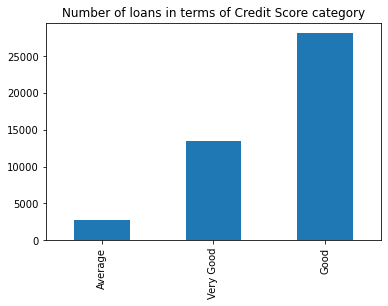

In [155]:
df_imputed['Credit_Score'].value_counts().sort_values(ascending = True).plot(kind='bar', title ='Number of loans in terms of Credit Score category')

In [156]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit_Score'], drop_first = True))
df_imputed.rename(index = str, columns={'Good':'Credit Good', 'Very Good':'Credit Very Good'})
df_imputed = df_imputed.drop(['Credit_Score'], axis=1);

In [157]:
df_imputed.head()

,Current_Loan_Amount,Term,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good
0,23023.00,0.00,10.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00,0,0
1,8126.00,1.00,2.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00,1,0
2,5042.00,1.00,10.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00,0,1
3,14139.00,0.00,1.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00,1,0
4,15191.00,0.00,10.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00,1,0


In [158]:
df_imputed['Employment History'] = df_imputed['Years_in_current_job'].apply(lambda x: "Emp Level Jr." if x<4 else ("Emp Level Mid" if x>4 and x<8 else "Emp Senior"))
df_imputed = df_imputed.drop(['Years_in_current_job'], axis=1)
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Employment History'],drop_first = True))
df_imputed = df_imputed.drop(['Employment History'], axis=1)

In [159]:
df_imputed.head()

,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior
0,23023.00,0.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,0.00,23188.00,31732.00,0.00,0.00,0,0,0,1
1,8126.00,1.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,0.00,6135.00,13095.60,0.20,0.00,1,0,0,0
2,5042.00,1.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,0.00,6698.00,17958.00,0.00,0.00,0,1,0,1
3,14139.00,0.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,0.00,5928.00,7273.00,0.00,0.00,1,0,0,0
4,15191.00,0.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,0.00,10714.00,11243.00,0.00,0.00,1,0,0,1


<AxesSubplot:title={'center':'Loans vs Credit problems of Loanee'}>

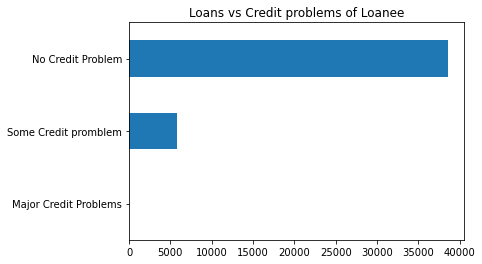

In [160]:
df_imputed['Credit Problems'] = df_imputed['Number_of_Credit_Problems'].apply(lambda x: "No Credit Problem" if x==0 else ("Some Credit promblem" if x>0 and x<5 else "Major Credit Problems"))
df_imputed['Credit Problems'].value_counts().sort_values(ascending=True).plot(kind='barh', title="Loans vs Credit problems of Loanee")

In [161]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit Problems'],drop_first = True))
df_imputed = df_imputed.drop(['Credit Problems','Number_of_Credit_Problems'], axis=1)

In [162]:
df_imputed.head()

,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem
0,23023.00,0.00,0.00,72230.00,3.00,613.96,14.00,17.40,11.00,23188.00,31732.00,0.00,0.00,0,0,0,1,1,0
1,8126.00,1.00,2.00,55869.00,3.00,665.78,10.90,27.40,14.00,6135.00,13095.60,0.20,0.00,1,0,0,0,1,0
2,5042.00,1.00,0.00,40332.00,3.00,873.86,16.40,11.00,6.00,6698.00,17958.00,0.00,0.00,0,1,0,1,1,0
3,14139.00,0.00,2.00,70693.00,3.00,482.48,19.50,33.00,8.00,5928.00,7273.00,0.00,0.00,1,0,0,0,1,0
4,15191.00,0.00,0.00,38442.00,3.00,611.87,17.80,0.00,4.00,10714.00,11243.00,0.00,0.00,1,0,0,1,1,0


In [163]:
df_imputed['Credit Age'] = df_imputed['Years_of_Credit_History'].apply(lambda x: "Short Credit Age" if x<5 else ("Good Credit Age" if x>5 and x<17 else "Exceptional Credit Age"))

In [164]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Credit Age'],drop_first = True))
df_imputed = df_imputed.drop(['Credit Age','Years_of_Credit_History'], axis =1)
df_imputed.head()

,Current_Loan_Amount,Term,Home_Ownership,Annual_Income,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age
0,23023.00,0.00,0.00,72230.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0.00,0.00,0,0,0,1,1,0,1,0
1,8126.00,1.00,2.00,55869.00,3.00,665.78,27.40,14.00,6135.00,13095.60,0.20,0.00,1,0,0,0,1,0,1,0
2,5042.00,1.00,0.00,40332.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0.00,0.00,0,1,0,1,1,0,1,0
3,14139.00,0.00,2.00,70693.00,3.00,482.48,33.00,8.00,5928.00,7273.00,0.00,0.00,1,0,0,0,1,0,0,0
4,15191.00,0.00,0.00,38442.00,3.00,611.87,0.00,4.00,10714.00,11243.00,0.00,0.00,1,0,0,1,1,0,0,0


In [165]:
meanxoutlier = df_imputed[df_imputed['Annual_Income'] < 99999999.00 ]['Annual_Income'].mean()
stddevxoutlier = df_imputed[df_imputed['Annual_Income'] < 99999999.00 ]['Annual_Income'].std()
poorline = meanxoutlier -  stddevxoutlier
richline = meanxoutlier + stddevxoutlier

In [166]:
df_imputed['Annual_Income'] = df_imputed['Annual_Income'].apply(lambda x: "Low Income" if x<=poorline else ("Average Income" if x>poorline and x<richline else "High Income"))
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Annual_Income'],drop_first = True))
df_imputed = df_imputed.drop(['Annual_Income'], axis=1)
df_imputed.head()

,Current_Loan_Amount,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,...,Good,Very Good,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income
0,23023.00,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0.00,...,0,0,0,1,1,0,1,0,0,0
1,8126.00,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,0.20,...,1,0,0,0,1,0,1,0,0,0
2,5042.00,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0.00,...,0,1,0,1,1,0,1,0,0,0
3,14139.00,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,0.00,...,1,0,0,0,1,0,0,0,0,0
4,15191.00,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,0.00,...,1,0,0,1,1,0,0,0,0,0


In [167]:
lmeanxoutlier = df_imputed[df_imputed['Current_Loan_Amount'] < 99999999.00 ]['Current_Loan_Amount'].mean()
lstddevxoutlier = df_imputed[df_imputed['Current_Loan_Amount'] < 99999999.00 ]['Current_Loan_Amount'].std()
lowrange = lmeanxoutlier - lstddevxoutlier
highrange = lmeanxoutlier + lstddevxoutlier
print(lowrange, highrange)
df_imputed['Current_Loan_Amount'] = df_imputed['Current_Loan_Amount'].apply(lambda x: "Small Loan" if x<=lowrange else ("Medium Loan" if x>lowrange and x<highrange else "Big Loan"))

5735.0418905873685 22265.766270657965


In [168]:
df_imputed = df_imputed.join(pd.get_dummies(df_imputed['Current_Loan_Amount'],drop_first = True))
df_imputed = df_imputed.drop(['Current_Loan_Amount'], axis=1)

In [169]:
df_imputed.head()

,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax Liens,...,Emp Level Mid,Emp Senior,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan
0,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0.00,0.00,...,0,1,1,0,1,0,0,0,0,0
1,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,0.20,0.00,...,0,0,1,0,1,0,0,0,1,0
2,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0.00,0.00,...,0,1,1,0,1,0,0,0,0,1
3,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,0.00,0.00,...,0,0,1,0,0,0,0,0,1,0
4,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,0.00,0.00,...,0,1,1,0,0,0,0,0,1,0


In [170]:
df_imputed.columns

Index(['Term', 'Home_Ownership', 'Purpose', 'Monthly Debt',
       'Months_since_last_delinquent', 'Number_of_Open_Accounts',
       'Current_Credit_Balance', 'Maximum_Open_Credit', 'Bankruptcies',
       'Tax Liens', 'Good', 'Very Good', 'Emp Level Mid', 'Emp Senior',
       'No Credit Problem', 'Some Credit promblem', 'Good Credit Age',
       'Short Credit Age', 'High Income', 'Low Income', 'Medium Loan',
       'Small Loan'],
      dtype='object')

In [171]:
df_imputed['Tax Liens'] = df_imputed['Tax Liens'].apply(lambda x: "No Tax Lien" if x==0 else ("Some Tax Liens" if x>0 and x<3 else "Many Tax Liens"))
df_imputed= df_imputed.join(pd.get_dummies(df_imputed['Tax Liens'],drop_first = True))
df_imputed= df_imputed.drop(['Tax Liens'],axis=1)

In [172]:
df_imputed.head()

,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Good,...,No Credit Problem,Some Credit promblem,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens
0,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0.00,0,...,1,0,1,0,0,0,0,0,1,0
1,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,0.20,1,...,1,0,1,0,0,0,1,0,1,0
2,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0.00,0,...,1,0,1,0,0,0,0,1,1,0
3,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,0.00,1,...,1,0,0,0,0,0,1,0,1,0
4,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,0.00,1,...,1,0,0,0,0,0,1,0,1,0


In [173]:
df_imputed['Bankruptcies'] = df_imputed['Bankruptcies'].apply(lambda x: "No bankruptcies" if x==0 else ("Some Bankruptcies" if x>0 and x<3 else "Many Bankruptcies"))
df_imputed= df_imputed.join(pd.get_dummies(df_imputed['Bankruptcies'],drop_first = True))
df_imputed= df_imputed.drop(['Bankruptcies'],axis=1)
df_imputed.head()

,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,Very Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,0,...,1,0,0,0,0,0,1,0,1,0
1,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,1,0,...,1,0,0,0,1,0,1,0,0,1
2,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,1,0,...,0,0,0,0,1,0,1,0,1,0
4,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,1,0,...,0,0,0,0,1,0,1,0,1,0


In [174]:
df_imputed_wosc = df_imputed

In [175]:
dataframe_label.head()

,Loan ID,Loan Status
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,Fully Paid
1,01825d5d-429a-4de6-b3d4-8618364d2df2,Charged Off
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,Fully Paid
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,Charged Off
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,Charged Off


In [183]:
cat_data = ['Loan Status']

In [184]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [185]:
for col in cat_data:
    dataframe_label[col]=le.fit_transform(dataframe_label[col])
    print(le.classes_)

['Charged Off' 'Fully Paid']


In [186]:
dataframe_label.head()

,Loan ID,Loan Status
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,1
1,01825d5d-429a-4de6-b3d4-8618364d2df2,0
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,1
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,0
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,0


In [187]:
y = dataframe_label['Loan Status']
X = df_imputed_wosc

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [189]:
lregclassifier = LogisticRegression()
lregclassifier.fit(X_train,y_train)
lregprediction = lregclassifier.predict(X_test)
print("Score: ",lregclassifier.score(X_test, y_test))

Score:  0.7165644171779141


In [190]:
tneg, fpos, fneg, tpos = confusion_matrix(y_test, lregprediction).ravel()
print(tneg,fpos,fneg,tpos)

0 4153 5 10512


F1 score:  0.8348840256847071
AUC:  0.5140484732853914


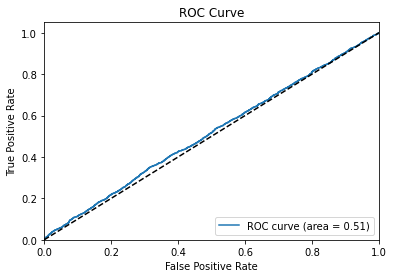

In [191]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Select the feature columns and target column
y = dataframe_label['Loan Status']
X = df_imputed_wosc

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

# Calculate AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

F1 score:  0.7380575767162291
AUC:  0.5473557896583578


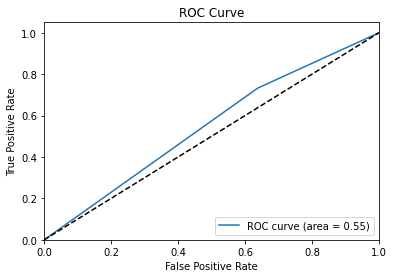

In [192]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('your_dataset.csv')

# Select the feature columns and target column
y = dataframe_label['Loan Status']
X = df_imputed_wosc

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score: ", f1)

# Calculate AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [193]:
df_imputed_wsc = df_imputed

In [194]:
y = dataframe_label['Loan Status']
X = df_imputed_wsc
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(X_train)
x_test = ro_scaler.fit_transform(X_test)

In [196]:
lr = LogisticRegression()

In [197]:
lr.fit(x_train , y_train)

LogisticRegression()

In [198]:
print(lr.score(x_train , y_train))
print(lr.score(x_test , y_test))

0.7244889351292073
0.7228658193679002


In [199]:
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

AUC:  0.5473557896583578


### SMOTE

In [200]:
df_smote = df_imputed

In [201]:
df_smote

,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,Very Good,...,Good Credit Age,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies
0,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,0,...,1,0,0,0,0,0,1,0,1,0
1,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,1,0,...,1,0,0,0,1,0,1,0,0,1
2,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,1,...,1,0,0,0,0,1,1,0,1,0
3,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,1,0,...,0,0,0,0,1,0,1,0,1,0
4,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,1,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,1.00,2.00,3.00,1089.12,51.00,13.00,12844.00,23352.00,1,0,...,0,0,0,0,1,0,1,0,1,0
44450,1.00,2.00,3.00,509.07,0.00,8.00,3685.00,8570.00,0,1,...,1,0,0,0,0,1,1,0,0,1
44451,0.00,2.00,3.00,1224.49,0.00,16.00,14058.00,23828.00,0,0,...,1,0,0,0,0,0,1,0,1,0
44452,0.00,2.00,3.00,242.24,24.00,11.00,6618.00,19295.00,0,0,...,0,0,0,0,1,0,1,0,1,0


In [202]:
df_smote_c = pd.concat([df_smote, dataframe_label['Loan Status']], axis=1)

In [204]:
df_smote_c.head()

,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,Very Good,...,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,Loan Status
0,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,1,0,...,0,0,0,1,0,1,0,0,1,0
2,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,1,...,0,0,0,0,1,1,0,1,0,1
3,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,1,0,...,0,0,0,1,0,1,0,1,0,0
4,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,1,0,...,0,0,0,1,0,1,0,1,0,0


In [205]:
df_smote_c = df_smote_c.rename(columns={'Loan Status': 'Loan_Status'})

### Resampling
- A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

31868
12586


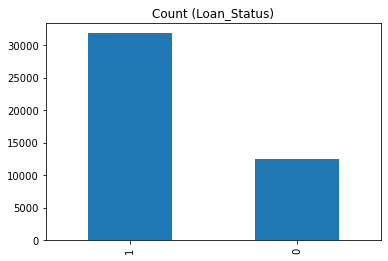

In [207]:
# Class count
count_class_0, count_class_1 = df_smote_c.Loan_Status.value_counts()
print(count_class_0)
print(count_class_1)
df_smote_c.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

In [208]:
# Divide by class
df_class_0 = df_smote_c[df_smote_c['Loan_Status'] == 1]
df_class_1 = df_smote_c[df_smote_c['Loan_Status'] == 0]
df_class_0

,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,Very Good,...,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,Loan_Status
0,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,0,...,0,0,0,0,0,1,0,1,0,1
2,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,1,...,0,0,0,0,1,1,0,1,0,1
5,0.00,2.00,7.00,544.58,0.00,7.00,3126.00,13711.00,1,0,...,0,0,0,1,0,1,0,0,1,1
6,1.00,0.00,5.00,240.16,0.00,4.00,533.00,2961.00,1,0,...,0,0,0,0,1,1,0,0,1,1
7,1.00,0.00,3.00,633.43,0.00,10.00,8854.00,10719.00,0,1,...,0,0,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44445,1.00,0.00,3.00,2040.82,1.00,13.00,27179.00,28791.00,1,0,...,0,0,0,1,0,1,0,1,0,1
44447,0.00,1.00,3.00,1355.33,0.00,30.00,21356.00,41227.00,1,0,...,0,0,0,1,0,1,0,1,0,1
44448,0.00,2.00,3.00,708.19,0.00,15.00,10059.00,19495.00,1,0,...,0,0,0,1,0,1,0,1,0,1
44450,1.00,2.00,3.00,509.07,0.00,8.00,3685.00,8570.00,0,1,...,0,0,0,0,1,1,0,0,1,1


## Random over-sampling


Random over-sampling:
1    31868
0    31868
Name: Loan_Status, dtype: int64


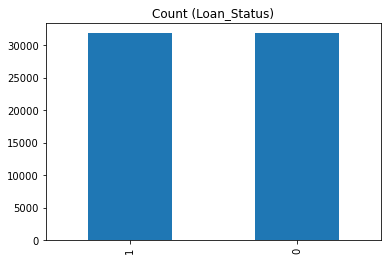

In [209]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Loan_Status.value_counts())

df_test_over.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

### Random under-sampling


Random under-sampling:
1    12586
0    12586
Name: Loan_Status, dtype: int64


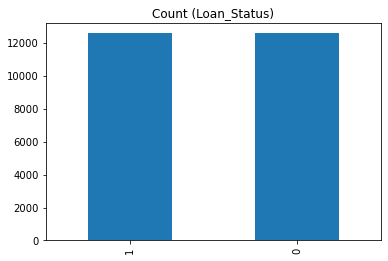

In [210]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Loan_Status.value_counts())

df_test_under.Loan_Status.value_counts().plot(kind='bar', title='Count (Loan_Status)');

### Over-sampling: SMOTE
- SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors

In [211]:
x1 = df_smote_c.drop(['Loan_Status'], axis=1)
y1 = df_smote_c['Loan_Status']
df_smote_c

,Term,Home_Ownership,Purpose,Monthly Debt,Months_since_last_delinquent,Number_of_Open_Accounts,Current_Credit_Balance,Maximum_Open_Credit,Good,Very Good,...,Short Credit Age,High Income,Low Income,Medium Loan,Small Loan,No Tax Lien,Some Tax Liens,No bankruptcies,Some Bankruptcies,Loan_Status
0,0.00,0.00,3.00,613.96,17.40,11.00,23188.00,31732.00,0,0,...,0,0,0,0,0,1,0,1,0,1
1,1.00,2.00,3.00,665.78,27.40,14.00,6135.00,13095.60,1,0,...,0,0,0,1,0,1,0,0,1,0
2,1.00,0.00,3.00,873.86,11.00,6.00,6698.00,17958.00,0,1,...,0,0,0,0,1,1,0,1,0,1
3,0.00,2.00,3.00,482.48,33.00,8.00,5928.00,7273.00,1,0,...,0,0,0,1,0,1,0,1,0,0
4,0.00,0.00,3.00,611.87,0.00,4.00,10714.00,11243.00,1,0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,1.00,2.00,3.00,1089.12,51.00,13.00,12844.00,23352.00,1,0,...,0,0,0,1,0,1,0,1,0,0
44450,1.00,2.00,3.00,509.07,0.00,8.00,3685.00,8570.00,0,1,...,0,0,0,0,1,1,0,0,1,1
44451,0.00,2.00,3.00,1224.49,0.00,16.00,14058.00,23828.00,0,0,...,0,0,0,0,0,1,0,1,0,0
44452,0.00,2.00,3.00,242.24,24.00,11.00,6618.00,19295.00,0,0,...,0,0,0,1,0,1,0,1,0,0


In [141]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable



In [212]:
import imblearn

In [213]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy= 'minority')
X_sm, y_sm = smote.fit_resample(x1, y1)

In [214]:
y_sm.value_counts()

1    31868
0    31868
Name: Loan_Status, dtype: int64

### Over-sampling followed by under-sampling
- Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

In [215]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_smt1, y_smt1 = smt.fit_resample(x1, y1)

In [216]:
y_smt1.value_counts()

1    28819
0    28819
Name: Loan_Status, dtype: int64

- #### i will try random forest after SMOTE()

In [217]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)
rf = RandomForestClassifier(n_estimators=100 ,max_features=6 ,    max_depth=8)

rf.fit(X_train , y_train)
print(rf.score(X_train , y_train))
print(rf.score(X_test , y_test))

0.7875081327260898
0.7751561415683553


In [218]:
Y_pred =rf.predict(X_test)

Confusion matrix:
 [[4066 1720]
 [ 872 4870]]


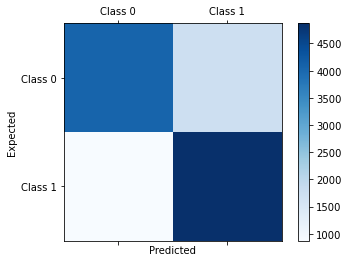

In [219]:
conf_mat1 = confusion_matrix(y_true=y_test, y_pred=Y_pred)
print('Confusion matrix:\n', conf_mat1)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat1, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [220]:
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", auc)

AUC:  0.8558048812378527


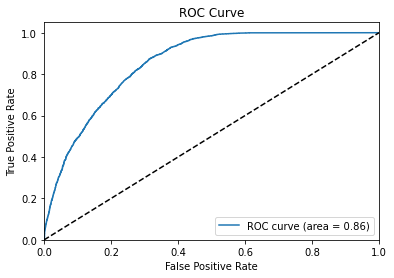

In [221]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [222]:
y_test.shape

(11528,)

In [223]:
X_test.shape

(11528, 24)

In [224]:
Y_pred.shape

(11528,)

In [225]:
# Calculate F1 score
f1 = f1_score(y_test, Y_pred)
print("F1 score: ", f1)

F1 score:  0.7898151151475835


F1-score: 0.786
AUC: 0.852


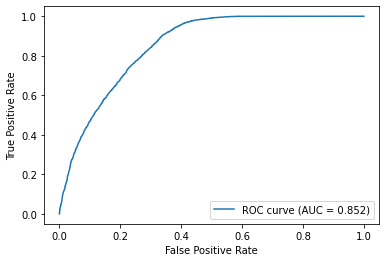

In [226]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
#df = pd.read_csv("path/to/your/dataset.csv")

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)

# create an instance of the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50, random_state=42)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.3f}".format(f1))

# calculate the AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {:.3f}".format(auc))

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.3f})".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

F1-score: 0.821
AUC: 0.873


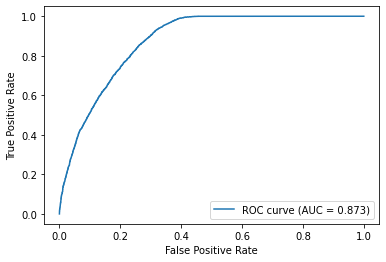

In [227]:
import xgboost as xgb
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# load the dataset
#df = pd.read_csv("path/to/your/dataset.csv")

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_smt1,y_smt1, test_size=0.2,random_state= 42)

# create an instance of the XGBClassifier
clf = xgb.XGBClassifier(n_estimators=50, random_state=42)

# fit the classifier to the training data
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the F1-score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.3f}".format(f1))

# calculate the AUC
y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: {:.3f}".format(auc))

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve (AUC = {:.3f})".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

## Best Performing model:
## AUC Score: 0.873